In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Clustering

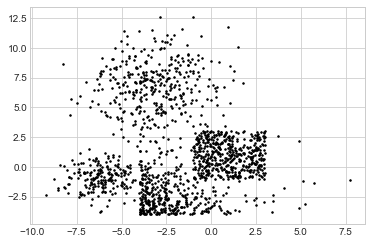

In [3]:
# generate fake data
A = np.random.normal(loc=(-3,7), scale=2, size=(350,2))
B = np.random.uniform(low=-1, high=3, size=(450,2)) # A[:,i] is 100,000 samples with uniform distribution
C = np.random.chisquare(df=2, size=(400,2)) - 4  # B[:,j] is 100,000 samples with exponential distribution
D = np.random.normal(loc=(-6,-1), scale=1.1, size=(200,2))
X = np.concatenate((A, B, C,D), axis=0)

plt.plot(X[:,0], X[:,1], '.', color='black', markersize=3);


## k-means clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans_clusters = KMeans(n_clusters=4, random_state=0).fit(X) # also try running with n_clusters 3 or 5
                                                
print(kmeans_clusters.labels_.shape)
print(kmeans_clusters.labels_[0:-1:20])
print(kmeans_clusters.cluster_centers_)


(1400,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 3 3 3 0 1 3 3 3 3 3 3 0 3 3 3 3 0 3 3 2 2 2 2 2 2 2 2 2 2]
[[ 0.96580786  0.90587076]
 [-3.19837385  7.00086395]
 [-5.71598082 -0.62162943]
 [-2.34506949 -2.68433559]]


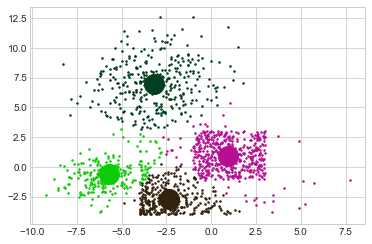

In [6]:
cluster_count = len(kmeans_clusters.cluster_centers_)

for i in range(0,cluster_count): # random colours
  r = np.random.random()**2  
  g = np.random.random()**2
  b = np.random.random()**2
  c = (r, g, b)

  plt.plot(X[kmeans_clusters.labels_==i,0], X[kmeans_clusters.labels_==i,1], '.', color=c,markersize=3);
  plt.plot(kmeans_clusters.cluster_centers_[i,0], kmeans_clusters.cluster_centers_[i,1], 'o', color=c, markersize=20)


## Mean shift clustering

In [7]:
from sklearn.cluster import MeanShift

In [8]:
meanshift_clusters = MeanShift(bandwidth=2.5).fit(X) # also try with other values of bandwidth

cluster_count = len(meanshift_clusters.cluster_centers_)

print(cluster_count)
print(meanshift_clusters.labels_[0:1500:10])

3
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 2 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
meanshift_clusters.cluster_centers_

array([[ 0.88025569,  0.95420682],
       [-2.83182762, -2.48013048],
       [-3.10634185,  6.6531214 ]])

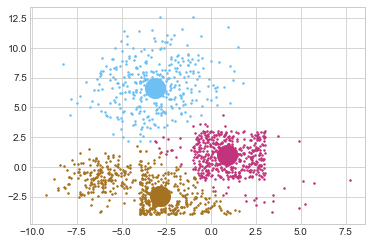

In [10]:
for i in range(0,cluster_count) :
  r = np.random.random()
  b = np.random.random()
  g = np.random.random()
  c = (r, g, b)
  plt.plot(X[meanshift_clusters.labels_==i,0], X[meanshift_clusters.labels_==i,1], '.', color=c, markersize=3);
  plt.plot(meanshift_clusters.cluster_centers_[i,0], meanshift_clusters.cluster_centers_[i,1], 'o', color=c, markersize=20)
  

## Clustering for (very simple) Image Segmentation

In [11]:
if False: # only if you're running this in colab
    !pip install opencv-python

import cv2
from sklearn.cluster import estimate_bandwidth # to automatically estimate a good bandwidth for mean shift

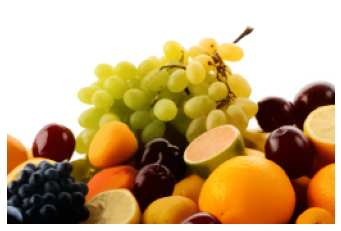

In [12]:
# if False: # only if you're running this in colab
#     img = cv2.imread('/content/drive/My Drive/256px-Fruits.png')
# else:
#     img = cv2.imread('256px-Fruits.png')
img = cv2.imread('./images/256px-Fruits.png')

img = cv2.bilateralFilter(img,30,40,75) 

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off');

In [13]:
# let's cluster based on R, G, B, and x and y pixel coordinates
x_coords, y_coords = np.meshgrid(range(img.shape[0]), range(img.shape[1]), indexing='ij')

In [14]:
print(img.shape)
print(x_coords.shape)
print(y_coords.shape)

(170, 256, 3)
(170, 256)
(170, 256)


In [22]:
x_coords

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [167, 167, 167, ..., 167, 167, 167],
       [168, 168, 168, ..., 168, 168, 168],
       [169, 169, 169, ..., 169, 169, 169]])

In [23]:
y_coords

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]])

In [27]:
# flatten the image, and x and y coordinates

flat_img = img.reshape((-1,3))
flat_img = np.float32(flat_img)
flat_img = flat_img / flat_img.max()

flat_x = x_coords.reshape(-1)
flat_x = np.float32(flat_x)
flat_x = flat_x / flat_x.max() 

flat_y = y_coords.reshape(-1)
flat_y = np.float32(flat_y)
flat_y = flat_y / flat_y.max() 

In [28]:
if True:
  # concat to make an N x 5 vector
  f = np.column_stack((flat_img, flat_x, flat_y))

else:
  # just use RGB (and not x & y)
  f = flat_img

f.shape

(43520, 5)

In [29]:
# estimate bandwidth
bandwidth = estimate_bandwidth(f, quantile=.05, n_samples=2000)
print(bandwidth)

# # or manually set
# bandwidth = 0.1

0.26913655903829364


In [31]:
use_meanshift = True # use k-means if false

if use_meanshift: # use meanshift to cluster f
  ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
  ms.fit(f)
  labels = ms.labels_
else:
  kmeans_clusters = KMeans(n_clusters=10, random_state=0).fit(f) # also try running with n_clusters 3 or 5
  labels = kmeans_clusters.labels_

In [32]:
segments = np.unique(labels)
print(segments)
print('# segments: ', segments.shape[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
# segments:  13


In [33]:
I = np.reshape(labels, (img.shape[0],img.shape[1]))

(None, [], [])

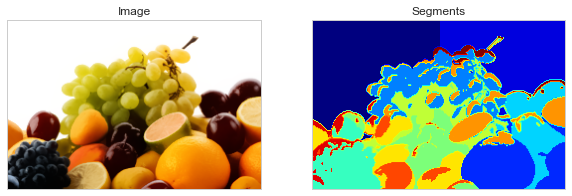

In [34]:
fig = plt.figure(figsize=(10,10));
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img2)
ax1.title.set_text('Image'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(I,cmap = 'jet')
ax2.title.set_text('Segments'), ax2.set_xticks([]), ax2.set_yticks([])

## Mean shift tracking

### reminder about HSV (hue / saturation / value) colour space

<div>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/HSV_cone.png/1200px-HSV_cone.png width="350"/>
<img src=https://www.virtualartacademy.com/wp-content/uploads/2018/12/hue-saturation-value.png width="500"/>
</div>



In [38]:
cap = cv2.VideoCapture(0) # camera feed

# capture one frame
ret,frame = cap.read()

# detect a face on the first frame
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
face_boxes = face_detector.detectMultiScale(frame) 

if len(face_boxes)==0:
    print('no face detected')
    assert(False)

# initialize the tracing window around the (first) detected face
(x,y,w,h) = tuple(face_boxes[0]) 
track_window = (x,y,w,h)

#  region of interest for tracking
roi = frame[y:y+h, x:x+w]

# convert the roi to HSV so we can construct a histogram of Hue 
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# why do we need this mask? (remember the cone?)
# read the description for Figure 3 in the original Cam Shift paper: http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.14.7673 
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))


# form histogram of hue in the roi
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])

# normalize the histogram array values so they are in the min=0 to max=255 range
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# termination criteria for mean shift: 10 iteration or shift less than 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
    
    # grab a frame
    ret ,frame = cap.read() 
    
    if ret == True: 
  
        # convert to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # histogram back projection using roi_hist 
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # use meanshift to shift the tracking window
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # display tracked window
        x,y,w,h = track_window
        img = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255),5)
        
        cv2.imshow('mean shift tracking demo',img)
        
        if cv2.waitKey(33) & 0xFF == 27: # wait a bit and exit is ESC is pressed
            break
        
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

no face detected


AssertionError: 

## Cam shift tracking


In [ ]:
cap = cv2.VideoCapture(0) # camera feed

# capture one frame
ret,frame = cap.read()

# detect a face on the first frame
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
face_boxes = face_detector.detectMultiScale(frame) 

if len(face_boxes)==0:
    print('no face detected')
    assert(False)

# initialize the tracing window around the (first) detected face
(x,y,w,h) = tuple(face_boxes[0]) 
track_window = (x,y,w,h)

#  region of interest for tracking
roi = frame[y:y+h, x:x+w]

# convert the roi to HSV so we can construct a histogram of Hue 
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# why do we need this mask? (remember the cone?)
# read the description for Figure 3 in the original Cam Shift paper: http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.14.7673 
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))


# form histogram of hue in the roi
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])

# normalize the histogram array values so they are in the min=0 to max=255 range
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# termination criteria for mean shift: 10 iteration or shift less than 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
    
    # grab a frame
    ret ,frame = cap.read() 
    
    if ret == True: 
  
        # convert to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # histogram back projection using roi_hist 
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply camshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img = cv2.polylines(frame,[pts],True, 255,2)

        cv2.imshow('cam shift tracking demo',img)
        
        if cv2.waitKey(1) & 0xFF == 27: # wait 1 ms and exit is ESC is pressed
            break
        
    else:
        break
        
cv2.destroyAllWindows()
cap.release()